In [ ]:
# Import modules
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.dates import AutoDateLocator, AutoDateFormatter
import cmocean.cm as cmo

In [ ]:
# Load OOI data into the workspace using the
# ERDDAP link to the public dataset CSV.
ooi_irm = pd.read_csv(
    "https://erddap.bco-dmo.org/erddap/files/"
    "bcodmo_dataset_911407_v1/"
    "911407_v1_ooi_irminger_sea_discrete"
    "_water_sampling_data.csv"
)

In [ ]:
# Assign colormaps from cmocean package
cmap_salt = cmo.haline
cmap_oxy = cmo.oxy
alt_oxy = cmo.deep_r
cmap_nitr = cmo.matter
cmap_time = cmo.tempo_r

In [82]:
# Convert the CTD Bottle Closure Time to a datetime data type
time = pd.to_datetime(ooi_irm["CTD_Bottle_Closure_Time"], yearfirst=True, utc=True).values
mpl_time = mpl.dates.date2num(time)

# Create normalizer for colorbar representing the full date range
normalizer = Normalize(mpl_time[0], mpl_time[-1])

# Create tick locator for using time as the color scale
locator = AutoDateLocator()

Text(0.5, 0, 'Time')

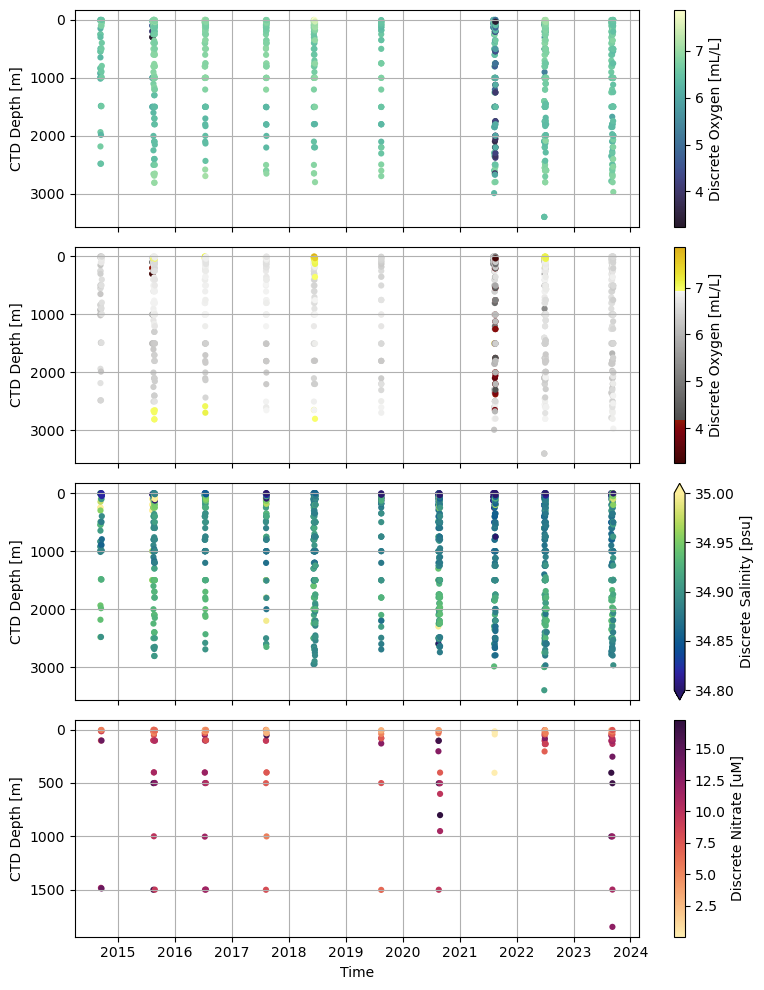

In [97]:
# Create the subplots with time on the x-axis
fig, axs = plt.subplots(4, 1, figsize=(8,10), sharex=True, layout="tight")
# CTD Oxygen
plt.subplot(4,1,1)
axs[0].invert_yaxis()
plt.scatter(x=time, y=ooi_irm["CTD_Depth"], s=20,
            c=ooi_irm["Discrete_Oxygen"], cmap=alt_oxy,
            edgecolors="none")
plt.grid()
plt.colorbar(label="Discrete Oxygen [mL/L]")
axs[0].set_ylabel("CTD Depth [m]")
# Discrete Oxygen
plt.subplot(4,1,2)
axs[1].invert_yaxis()
plt.scatter(x=time, y=ooi_irm["CTD_Depth"], s=20,
            c=ooi_irm["Discrete_Oxygen"], cmap=cmap_oxy,
            edgecolors="none")
plt.grid()
plt.colorbar(label="Discrete Oxygen [mL/L]")
axs[1].set_ylabel("CTD Depth [m]")
# Discrete Salinity
plt.subplot(4,1,3)
axs[2].invert_yaxis()
plt.scatter(x=time, y=ooi_irm["CTD_Depth"], s=20,
            c=ooi_irm["Discrete_Salinity"], cmap=cmap_salt,
            edgecolors="none", vmin=34.8, vmax=35)
plt.grid()
plt.colorbar(label="Discrete Salinity [psu]", extend='both')
axs[2].set_ylabel("CTD Depth [m]")
# Discrete Nitrate
plt.subplot(4,1,4)
axs[3].invert_yaxis()
plt.scatter(x=time, y=ooi_irm["CTD_Depth"], s=20,
            c=ooi_irm["Discrete_Nitrate"], cmap=cmap_nitr,
            edgecolors="none")
plt.grid()
plt.colorbar(label="Discrete Nitrate [uM]")
axs[3].set_ylabel("CTD Depth [m]")
axs[3].set_xlabel("Time")

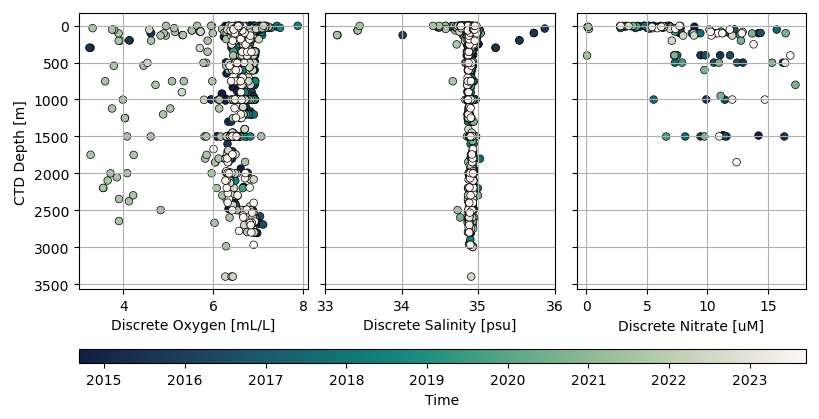

In [98]:
# Create the subplots with time indicated by color
fig, axs = plt.subplots(1, 3, figsize=(8,4), sharey=True, constrained_layout=True)
subfig = fig.subfigures(nrows=1, ncols=1)

# Discrete Oxygen
plt.subplot(1,3,1)
axs[0].invert_yaxis()
plt.scatter(x=ooi_irm["Discrete_Oxygen"], y=ooi_irm["CTD_Depth"], s=30,
            c=mpl_time, cmap=cmap_time, norm=normalizer,
            edgecolors="k", linewidths=0.5)
plt.grid()
axs[0].set_ylabel("CTD Depth [m]")
axs[0].set_xlabel("Discrete Oxygen [mL/L]")

# Discrete Salinity
plt.subplot(1,3,2)
axs[1].invert_yaxis()
plt.scatter(x=ooi_irm["Discrete_Salinity"], y=ooi_irm["CTD_Depth"],
            c=mpl_time, cmap=cmap_time, s=30, norm=normalizer,
            edgecolors="k", linewidths=0.5)
plt.grid()
axs[1].set_xlabel("Discrete Salinity [psu]")
axs[1].set_xlim([33,36])

# Discrete Nitrate
plt.subplot(1,3,3)
axs[2].invert_yaxis()
plt.scatter(x=ooi_irm["Discrete_Nitrate"], y=ooi_irm["CTD_Depth"], s=30,
            c=mpl_time, cmap=cmap_time, norm=normalizer,
            edgecolors="k", linewidths=0.5)
plt.grid()
axs[2].set_xlabel("Discrete Nitrate [uM]")

time_map = cm.ScalarMappable(norm=normalizer, cmap=cmap_time)
subfig.colorbar(time_map, ax=axs.ravel().tolist(), label="Time", ticks=AutoDateLocator(),
             format=AutoDateFormatter(locator), location="bottom", aspect=50)
plt.show()